In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import libaries
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
import copy

In [3]:
# setup debug for prints troubleshooting
debug = True

In [4]:
# Load in C50train located ../C50train/
train_dir = '../C50train'
# get name of directories, authors (these will be the labels)
train_sub = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
label_lst = np.copy(train_sub)

if debug:
    print(train_dir)
    print(label_lst)

# setup the initial empty variables
train = []
train_v = []
label = []

# load the input data from C50train directory and process it

# format will be something like this
# ===================================
# | Label         | Train           |
# ===================================
# | AaronPressman | 2537newsML.txt  |
# ===================================
# | AaronPressman | 14014newsML.txt |
# ===================================
# | ...           | ...             |
# ===================================
# | AlanCrosby    | 10306newsML.txt |
# ===================================
# | ...           | ...             |


auth_idx = 0

# go within the author directory to get list of the file names, this will be the training data
for i in train_sub:
    sub2_dir  = '../C50train/' + i 
    train_sub2 = [name for name in os.listdir(sub2_dir) if os.path.isfile(os.path.join(sub2_dir, name))]

    #if debug:
    #    print(sub2_dir)
    #    print(train_sub2)
        
    # in each author file, save the author as the label and the text as its training data
    for j in train_sub2:
        sub3  = '../C50train/' + i + '/' + j

        with open(sub3, 'r') as file:
            data = file.read()
            data_no_nw = data.replace('\n', '').replace('\r', '')
            train.append(data_no_nw)

        # append author index as label
        label.append(auth_idx)

    # increment author index
    auth_idx = auth_idx + 1
        
        #if debug:
        #    print(sub3)

if debug:
    print(np.shape(train))
    print(np.shape(label))

    # bin count looking at label
    unused, idx = np.unique(label, return_counts=True)
    #print(unused)
    print(idx)

    print(train[0])
    print(label[0])
    #print(label)

../C50train
['AaronPressman' 'AlanCrosby' 'AlexanderSmith' 'BenjaminKangLim'
 'BernardHickey' 'BradDorfman' 'DarrenSchuettler' 'DavidLawder'
 'EdnaFernandes' 'EricAuchard' 'FumikoFujisaki' 'GrahamEarnshaw'
 'HeatherScoffield' 'JaneMacartney' 'JanLopatka' 'JimGilchrist' 'JoeOrtiz'
 'JohnMastrini' 'JonathanBirt' 'JoWinterbottom' 'KarlPenhaul' 'KeithWeir'
 'KevinDrawbaugh' 'KevinMorrison' 'KirstinRidley' 'KouroshKarimkhany'
 'LydiaZajc' "LynneO'Donnell" 'LynnleyBrowning' 'MarcelMichelson'
 'MarkBendeich' 'MartinWolk' 'MatthewBunce' 'MichaelConnor' 'MureDickie'
 'NickLouth' 'PatriciaCommins' 'PeterHumphrey' 'PierreTran' 'RobinSidel'
 'RogerFillion' 'SamuelPerry' 'SarahDavison' 'ScottHillis' 'SimonCowell'
 'TanEeLyn' 'TheresePoletti' 'TimFarrand' 'ToddNissen' 'WilliamKazer']
(2500,)
(2500,)
[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50]
The Internet may be overflowing with new technolo

In [ ]:
test_arr = []
f1_sco  = []
top_model = None
top_score = 0
top_vect = None

# loop .1 to .3 for test size range, in .05 increments
for i in range (0, 7):
    test_size = .1+i*0.05
    print("Test Size : " + str(test_size))
    
    # split the test data
    X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=test_size, random_state=1)

    # vectorize x_train and x_test from text to matrix
    vect = TfidfVectorizer(stop_words='english')
    x_train_vec = vect.fit_transform(X_train)
    x_test_vec = vect.transform(X_test)

    # use logistical regression
    model = LogisticRegression()
    model.fit(x_train_vec, y_train)

    # predict and check accuracy
    pred = model.predict(x_test_vec)
    rep = classification_report(y_test, pred)

    # check f1 score
    score = f1_score(y_test, pred, average='macro')

    test_arr.append(test_size)
    f1_sco.append(score)

    if(score > top_score):
        top_score = score
        top_model = copy.deepcopy(model)
        top_vect = vect

    if debug:
        #print(rep)
        print(score)
        #print(model)

model = top_model
vect = top_vect

Test Size : 0.1
0.7445659198043099
Test Size : 0.15000000000000002
0.7510173193716738
Test Size : 0.2
0.7707760915179679
Test Size : 0.25
0.7736089297189249
Test Size : 0.30000000000000004
0.7583656922620224
Test Size : 0.35
0.7546699386173268
Test Size : 0.4
0.7342280687083593


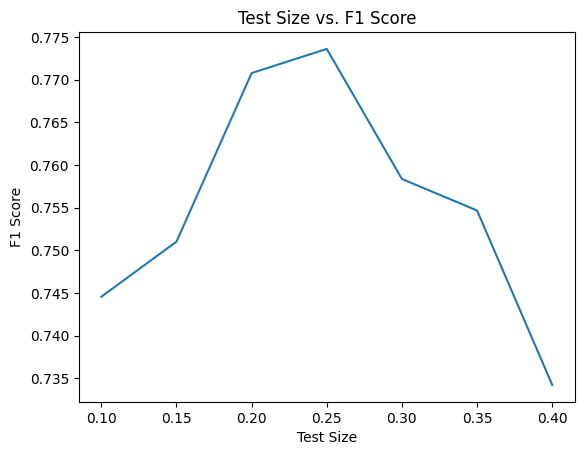

In [6]:
print_graph0 = True

if print_graph0:
    # plot the test size vs f1 score
    plt.plot(test_arr, f1_sco)
    plt.title("Test Size vs. F1 Score")
    plt.ylabel("F1 Score")
    plt.xlabel("Test Size")
    plt.show()

In [7]:
print_graph1 = False

if print_graph1:
    # fit PCA to see number of component for train data
    pca_tn = PCA()
    pca_tn.fit(x_train_vec)

    # setup to calculate cumulative variance
    cum_var = []
    tot_var = 0
    exp_var = pca_tn.explained_variance_ratio_

    # loop through explained varaince, sum as we go along to figure out cumulative variance
    for ev in exp_var:
        tot_var += ev
        cum_var.append(tot_var)

    # Plot cumulative variance
    plt.plot(cum_var)
    plt.title('Cumulative Variance over PCA Components')
    plt.xlabel('PCA Components')
    plt.ylabel('Cumulative Variance')
    plt.show()

In [8]:
# Load in C50test located ../C50test/
test_dir = '../C50test'
# get name of directories, authors (these will be the labels)
test_sub = [name for name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, name))]
test_lst = np.copy(train_sub)

if debug:
    print(test_dir)
    print(test_lst)

# setup the initial empty variables
test       = []
test_label = []

# load the input data from C50test directory and process it

auth_idx = 0

# go within the author directory to get list of the file names, this will be the training data
for i in train_sub:
    sub2_dir  = '../C50test/' + i 
    test_sub2 = [name for name in os.listdir(sub2_dir) if os.path.isfile(os.path.join(sub2_dir, name))]

    #if debug:
    #    print(sub2_dir)
    #    print(train_sub2)
        
    # in each author file, save the text as its test data
    for j in test_sub2:
        sub3  = '../C50test/' + i + '/' + j

        with open(sub3, 'r') as file:
            data = file.read()
            data_no_nw = data.replace('\n', '').replace('\r', '')
            test.append(data_no_nw)
        
        test_label.append(auth_idx)

    auth_idx = auth_idx + 1

if debug:
    print(np.shape(test))

../C50test
['AaronPressman' 'AlanCrosby' 'AlexanderSmith' 'BenjaminKangLim'
 'BernardHickey' 'BradDorfman' 'DarrenSchuettler' 'DavidLawder'
 'EdnaFernandes' 'EricAuchard' 'FumikoFujisaki' 'GrahamEarnshaw'
 'HeatherScoffield' 'JaneMacartney' 'JanLopatka' 'JimGilchrist' 'JoeOrtiz'
 'JohnMastrini' 'JonathanBirt' 'JoWinterbottom' 'KarlPenhaul' 'KeithWeir'
 'KevinDrawbaugh' 'KevinMorrison' 'KirstinRidley' 'KouroshKarimkhany'
 'LydiaZajc' "LynneO'Donnell" 'LynnleyBrowning' 'MarcelMichelson'
 'MarkBendeich' 'MartinWolk' 'MatthewBunce' 'MichaelConnor' 'MureDickie'
 'NickLouth' 'PatriciaCommins' 'PeterHumphrey' 'PierreTran' 'RobinSidel'
 'RogerFillion' 'SamuelPerry' 'SarahDavison' 'ScottHillis' 'SimonCowell'
 'TanEeLyn' 'TheresePoletti' 'TimFarrand' 'ToddNissen' 'WilliamKazer']
(2500,)


In [9]:
new_test_vec = vect.transform(test)

new_pred = model.predict(new_test_vec)

rep = classification_report(test_label, new_pred)

if debug:
    print(new_pred[0:999])
    print(rep)

ValueError: X has 24188 features, but LogisticRegression is expecting 26490 features as input.